# 11. Linear Regression

## 11.3 Ridge regression

### 11.3.3 Choosing the strength of the regularizer

> Plot the full L2 regularization path for the prostate data set
>
> Load prostate cancer data
> ```
> !wget https://github.com/probml/probml-data/blob/main/data/prostateStnd.mat?raw=true -O prostateStnd.mat
> ```
>
> matlab data is created by this  
> https://github.com/probml/pmtk3/blob/master/data/prostate/prostateDataMake.m
> ```
> data = loadmat('prostateStnd.mat')
> ```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# import requests
# url = "https://raw.githubusercontent.com/probml/probml-data/main/data/prostateStnd.mat"
# response = requests.get(url)
# rawdata = response.text
# rawdata = BytesIO(response.content)

from scipy.io import loadmat
data = loadmat('prostateStnd.mat', squeeze_me=True)
X, y, names = data['X'], data['y'], data['names']
X.shape, y.shape, names

((97, 8),
 (97,),
 array(['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason',
        'pgg45', 'lpsa'], dtype=object))

In [59]:
# Ridge regression
from sklearn.linear_model import Ridge

n_alpha = 30
alpha_list = np.logspace(5, 0, n_alpha)

coefs = []
for alpha in alpha_list:
    clf = Ridge(alpha=alpha).fit(X, y)
    coefs.append(clf.coef_)
coefs = np.asarray(coefs)

# Ridge regression with cross validation
from sklearn.linear_model import RidgeCV

reg = RidgeCV(alpha_list)
reg.fit(X, y)

coefs.shape, reg.coef_.shape, reg.alpha_

((30, 8), (8,), 7.278953843983146)

#### Figure 11.10: (a) Profiles of ridge coefficients for the prostate cancer example vs. bound $B$ on $\ell_2$ norm of $w$, so small $B$ (large $\lambda$) is on the left. The vertical line is the value chosen by 5-fold CV using the 1 standard error rule.

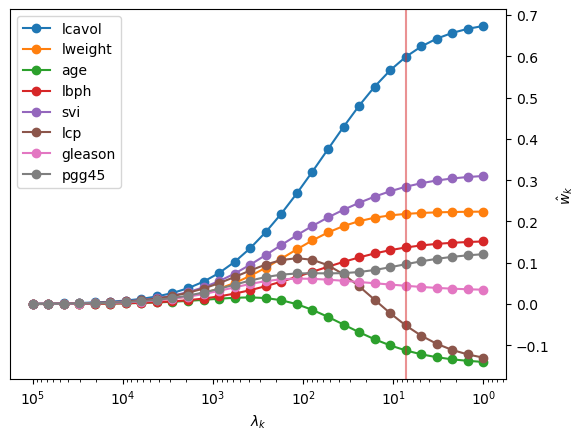

In [86]:
_, ax = plt.subplots()
ax.plot(alpha_list, coefs, marker='o', label=names[:coefs.shape[-1]])
ax.axvline(x=reg.alpha_, c='tab:red', alpha=0.5)
ax.invert_xaxis()
ax.set_xscale('log')
ax.set_xlabel('$\lambda_k$')
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set_ylabel('$\hat w_k$')
ax.legend();